In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [3]:
def predict_fire(img, interpreter, output = False, resize = True, index = False):
    # interpreter = tf.lite.Interpreter(model_path=model_path)
    classify = interpreter.get_signature_runner('serving_default')
    predictions = classify(sequential_input=img_array)['output']
    score = tf.nn.softmax(predictions)
    
    plt.imshow(mpimg.imread(imgp))
    print("Confidence: {}%".format(100 * np.max(score)))
    return (np.argmax(score))

Enter Path:  fire1.jpg


2022-12-10 09:51:24.824909: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-10 09:51:24.825440: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Confidence: 100.0%
fire


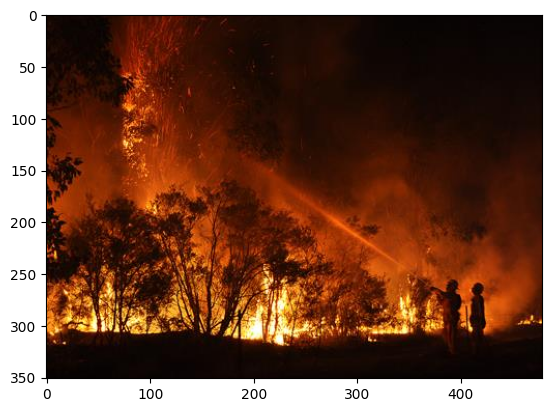

In [5]:
imgp = input("Enter Path: ")
imgp = "/Users/nealkotval/fire_recognition/test_cases/" + imgp
modelp = '/Users/nealkotval/fire_recognition/tflite_store/model_15epochs.tflite'
interpreter = tf.lite.Interpreter(model_path=modelp)
img = tf.keras.utils.load_img(
        imgp
)

class_names = ['fire', 'non_fire']

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.image.resize(img_array, [256,256])
img_array = tf.expand_dims(img_array, 0)
print(class_names[predict_fire(imgp, interpreter)])
